In [3]:
from google.colab import drive
drive.mount('/content/drive')

datadir = '/content/drive/My Drive/Notebooks/Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setting up the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# read the dataset
file_2017 = datadir + 'cos2017.csv'
file_2018 = datadir + 'cos2018.csv'
file_2019 = datadir + 'cos2019.csv'

df_2017 = pd.read_csv(file_2017, delimiter=';')
df_2018 = pd.read_csv(file_2018, delimiter=';')
df_2019 = pd.read_csv(file_2019, delimiter=';')

df_2017

,rank,name,country_of_origin,retail_revenue,parent_company_revenue,parent_company_net_income,dominant_operational_format,countries_of_operation,retail_revenue_cagr
0,1,"Wal-Mart Stores, Inc.",US,482130.0,482130.0,15080.0,Hypermarket/Supercenter/Superstore,30,0.027
1,2,Costco Wholesale Corporation,US,116199.0,116199.0,2409.0,Cash & Carry/Warehouse Club,10,0.083
2,3,The Kroger Co.,US,109830.0,109830.0,2049.0,Supermarket,1,0.060
3,4,Schwarz Unternehmenstreuhand KG,Germany,94448.0,94448.0,NaN,Discount Store,26,0.074
4,5,"Walgreens Boots Alliance, Inc.",US,89631.0,103444.0,4279.0,Drug Store/Pharmacy,10,0.059
...,...,...,...,...,...,...,...,...,...
245,246,SMU S.A.,Chile,3538.0,3573.0,0.0,Supermarket,2,0.168
246,247,"American Eagle Outfitters, Inc.",US,3522.0,3522.0,218.0,Apparel/Footwear Specialty,29,0.035
247,248,Abercrombie & Fitch Co.,US,3519.0,3519.0,39.0,Apparel/Footwear Specialty,22,0.003
248,249,Norma Lebensmittelfilialbetrieb Stiftung & Co.,Germany,3510.0,3510.0,NaN,Discount Store,4,0.033


# Question 1

How was the performance of a certain brand through the years?

In [50]:
def func(names):

  index1=df_2017.index[df_2017['name']== names].tolist()
  index2=df_2018.index[df_2018['name']==names].tolist()
  index3=df_2019.index[df_2019['name']==names].tolist()
  y = index1+index2+index3
  f_2017 = df_2017[df_2017.name == names].loc[index1, 'retail_revenue'].values
  f_2018 = df_2018[df_2018.name == names].loc[index2, 'retail_revenue'].values
  f_2019 = df_2019[df_2019.name == names].loc[index3, 'retail_revenue'].values
  y= np.array
  y= np.concatenate([f_2017, f_2018, f_2019])

  x= [2017,2018,2019]
  plt.plot(x,y, color="r", linewidth=3)
  plt.bar(x,y)
  plt.ylabel("Revenue ($)")
  plt.xticks(x, x)
  

We can see here that we just need to enter the name of the brand we want to search and the plot will be made accordingly

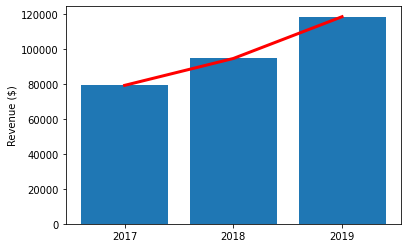

In [51]:
func('Amazon.com, Inc.')

# Question 2

Which countries have more companies or retailers originated in their own country around the world?

In [44]:
filter = df_2017.groupby(['country_of_origin']).count()
cols = list(df_2017.columns)
newcols = cols[:1]
frame = filter[newcols]
frame = frame.rename(columns={'rank': 'count'})
result = frame.sort_values(by=['count'], ascending=False)

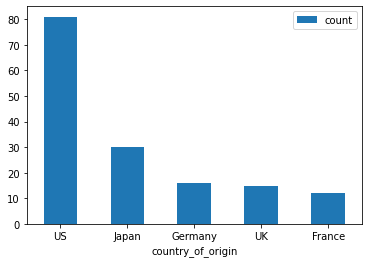

In [48]:
a = result.head()
a.plot(kind='bar', rot=0)

In [49]:
result.head(1)

,count
country_of_origin,
US,81


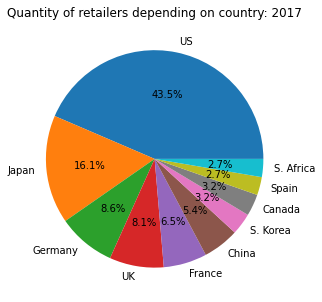

In [12]:
a = result.head(10)
a.plot.pie(y='count', figsize=(5, 5),  ylabel='', autopct='%1.1f%%', title='Quantity of retailers depending on country: 2017').get_legend().remove()

We can conclude the United States has 81 American brands around the world, this being the 43.5% of the Global 250 top retailers

# Question 3

What retailer has its brand operating in more countries?

,name,countries_of_operation
34,"Inditex, S.A.",96
97,Kering S.A.,95


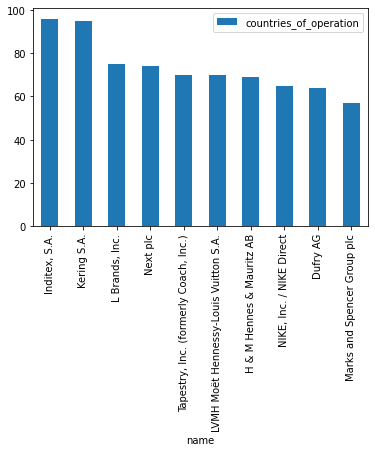

In [37]:
result = df_2019.sort_values(by=['countries_of_operation'], ascending=False)
a = result.head(10)
a.plot.bar(x='name', y= 'countries_of_operation')

As we can see Inditex S.A. and Kering S.A. are the companies which have their brand most present in countries of the world, but we cant distinguish if they have the same amount or Inditex is operating in more countries

In [38]:
a[['name','countries_of_operation']].head(2)

,name,countries_of_operation
34,"Inditex, S.A.",96
97,Kering S.A.,95


As we can see, Inditex is indeed operating in more countries

# Question 4

What brand earned the most revenue through the years?

In [19]:
def concatenate(yr1, yr2):
    years = range(yr1, yr2+1)
    pieces = []   
    columns = ['name', 'retail_revenue']
    for year in years:
        path = datadir +"cos"+ str(year) + '.csv'
        frame = pd.read_csv(path, delimiter=';')
        frame['year'] = year   
        pieces.append(frame)
    return pd.concat(pieces, ignore_index=True)  

df = concatenate(2017, 2019)
df

,rank,name,country_of_origin,retail_revenue,parent_company_revenue,parent_company_net_income,dominant_operational_format,countries_of_operation,retail_revenue_cagr,year
0,1,"Wal-Mart Stores, Inc.",US,482130.0,482130.0,15080.0,Hypermarket/Supercenter/Superstore,30,0.027,2017
1,2,Costco Wholesale Corporation,US,116199.0,116199.0,2409.0,Cash & Carry/Warehouse Club,10,0.083,2017
2,3,The Kroger Co.,US,109830.0,109830.0,2049.0,Supermarket,1,0.060,2017
3,4,Schwarz Unternehmenstreuhand KG,Germany,94448.0,94448.0,NaN,Discount Store,26,0.074,2017
4,5,"Walgreens Boots Alliance, Inc.",US,89631.0,103444.0,4279.0,Drug Store/Pharmacy,10,0.059,2017
...,...,...,...,...,...,...,...,...,...,...
745,246,"American Eagle Outfitters, Inc.",US,3796.0,3796.0,204.0,Apparel/Footwear Specialty,31,0.018,2019
746,247,Coop Sverige AB,Sweden,3764.0,3764.0,2.0,Supermarket,1,NaN,2019
747,248,"Heiwado Co., Ltd.",Japan,3743.0,3931.0,86.0,Hypermarket/Supercenter/Superstore,2,0.023,2019
748,249,Magazine Luiza S.A.,Brazil,3735.0,3752.0,122.0,Other Specialty,1,0.111,2019


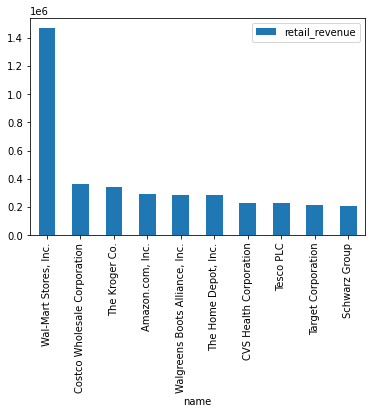

In [34]:
total = df.pivot_table(index='name', values='retail_revenue', aggfunc=sum)
sorted = total.sort_values(by=['retail_revenue'], ascending=False)
a= sorted.head(10)
a.plot.bar()

We can conclude that according to the data, Walmart was the brand that earned the most revenue during the years 2017-2019